# Visualizacion de características en Pytorch

Este notebook muestra cómo visualizar los mapas de activación y los filtros visuales en una red neuronal convolucional básica utilizando PyTorch.


Files already downloaded and verified


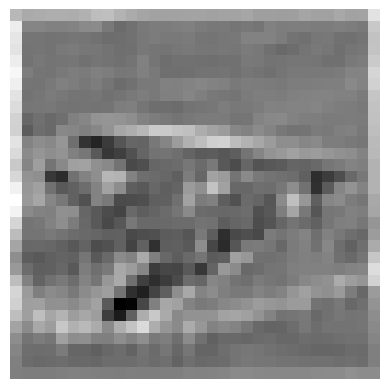

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

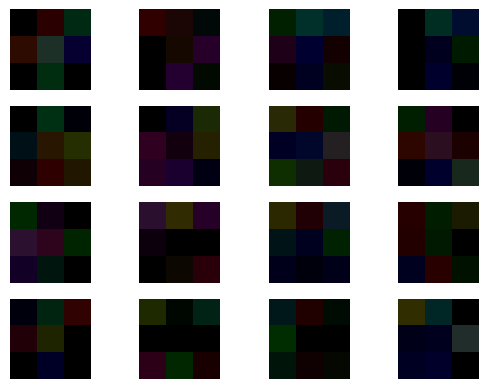

In [2]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

# Definir una red neuronal convolucional básica
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        return x

# Cargar un conjunto de datos de ejemplo (por ejemplo, CIFAR-10)
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])
dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

# Crear una instancia del modelo
model = CNN()

# Visualizar mapas de activación
def visualize_activation_maps(model, image):
    activations = []
    def hook_fn(module, input, output):
        activations.append(output.squeeze().detach().cpu().numpy())
    
    # Registrar los ganchos en las capas convolucionales
    for module in model.modules():
        if isinstance(module, nn.Conv2d):
            module.register_forward_hook(hook_fn)
    
    # Ejecutar la imagen a través del modelo
    with torch.no_grad():
        model.eval()
        model(image)
    
    # Visualizar los mapas de activación
    for i, activation in enumerate(activations):
        plt.subplot(1, len(activations), i+1)
        plt.imshow(activation[0], cmap='gray')  # Solo mostramos el primer canal (escala de grises)
        plt.axis('off')
    plt.show()

# Visualizar filtros visuales
def visualize_filters(model):
    filters = model.conv1.weight.detach().cpu().numpy()
    for i in range(filters.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(filters[i].transpose(1, 2, 0))
        plt.axis('off')
    plt.show()

# Obtener una imagen de muestra
image, _ = next(iter(dataloader))

# Visualizar mapas de activación
visualize_activation_maps(model, image)

# Visualizar filtros visuales
visualize_filters(model)


Enunciado del ejercicio: Visualización de mapas de activación y filtros visuales

Objetivo: El objetivo de este ejercicio es comprender cómo visualizar los mapas de activación y los filtros visuales en una red neuronal convolucional básica utilizando PyTorch.

Instrucciones:

    Importa las bibliotecas necesarias, incluyendo PyTorch y matplotlib.
    Crea una red neuronal convolucional básica utilizando PyTorch. Puedes definir tu propia arquitectura o utilizar una ya existente, como LeNet-5.
    Carga una imagen de ejemplo y prepárala para la entrada a la red neuronal convolucional.
    Realiza una inferencia en la red neuronal convolucional utilizando la imagen de ejemplo.
    Visualiza los filtros visuales (pesos) de las capas convolucionales de la red neuronal convolucional.
    Visualiza los mapas de activación generados por cada capa convolucional para la imagen de ejemplo.

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision

In [4]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc = nn.Linear(32 * 8 * 8, 10)  # Modificar el tamaño de entrada
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.pool(out)
        out = self.conv2(out)
        out = self.relu(out)
        out = self.pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet()


Para cargar una imagen de ejemplo y prepararla para la entrada a la red neuronal convolucional, puedes utilizar el siguiente código:

In [5]:
from PIL import Image
import torchvision.transforms as transforms

# Cargar imagen de ejemplo
image_path = 'gato.png'
image = Image.open(image_path)

# Transformaciones para preparar la imagen
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

# Aplicar transformaciones a la imagen
input_image = transform(image).unsqueeze(0)


Para realizar una inferencia en la red neuronal convolucional utilizando la imagen de ejemplo, puedes usar el siguiente código:

In [6]:
model.eval()
with torch.no_grad():
    output = model(input_image)
    predicted_class = torch.argmax(output).item()


Para visualizar los filtros visuales (pesos) de las capas convolucionales de la red neuronal convolucional, puedes utilizar el siguiente código:

torch.Size([16, 3, 3, 3])
(22, 22, 3)
torch.Size([32, 16, 3, 3])
(22, 42, 16)


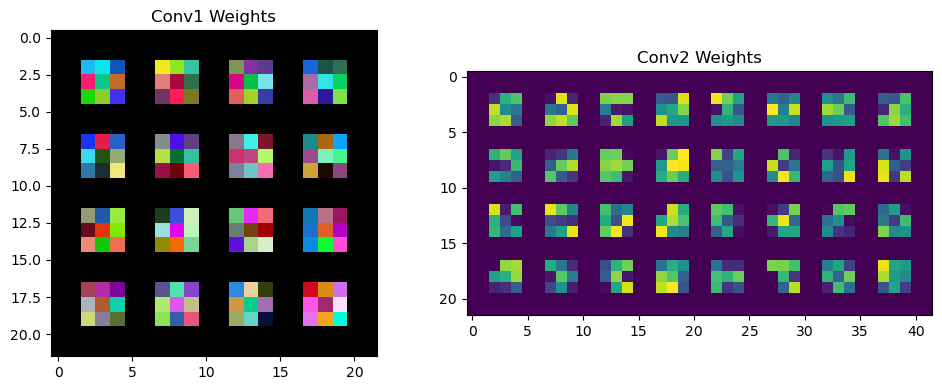

In [7]:
import torchvision.utils as vutils

# Obtener los pesos de las capas convolucionales
conv1_weights = model.conv1.weight.detach().cpu()
conv2_weights = model.conv2.weight.detach().cpu()

# Ajustar las dimensiones de los filtros visuales
conv1_weights = conv1_weights - conv1_weights.min()
conv1_weights = conv1_weights / conv1_weights.max()
conv2_weights = conv2_weights - conv2_weights.min()
conv2_weights = conv2_weights / conv2_weights.max()

# Visualizar los filtros visuales
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Conv1 Weights')
print(conv1_weights.shape)
print(vutils.make_grid(conv1_weights, nrow=4).permute(1, 2, 0).numpy().shape)
plt.imshow(vutils.make_grid(conv1_weights, nrow=4).permute(1, 2, 0).numpy())

plt.subplot(1, 2, 2)
plt.title('Conv2 Weights')
print(conv2_weights.shape)
print(vutils.make_grid(conv2_weights, nrow=8).permute(1, 2, 0).numpy().shape)
plt.imshow(vutils.make_grid(conv2_weights, nrow=8).permute(1, 2, 0).numpy()[:,:,1])

plt.tight_layout()
plt.show()


Para visualizar los mapas de activación generados por cada capa convolucional para la imagen de ejemplo, puedes utilizar el siguiente código:

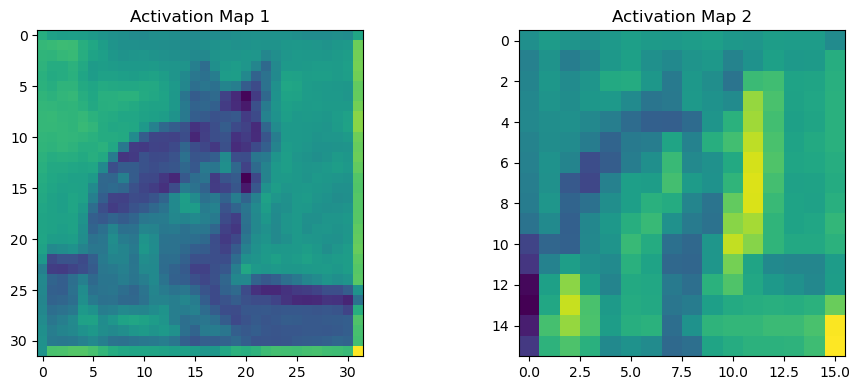

In [8]:
# Obtener los mapas de activación de cada capa convolucional
activation_maps = []

def hook_fn(module, input, output):
    activation_maps.append(output.detach().cpu())

model.conv1.register_forward_hook(hook_fn)
model.conv2.register_forward_hook(hook_fn)

# Realizar una inferencia en la red neuronal convolucional
model.eval()
with torch.no_grad():
    _ = model(input_image)

# Visualizar los mapas de activación
plt.figure(figsize=(10, 4))
for i, activation_map in enumerate(activation_maps):
    plt.subplot(1, len(activation_maps), i + 1)
    plt.title(f'Activation Map {i+1}')
    plt.imshow(torchvision.utils.make_grid(activation_map, nrow=8).permute(1, 2, 0)[:,:,0])

plt.tight_layout()
plt.show()
